# Train-Test Split

Train-Test Split adalah proses membagi data menjadi dua bagian:<br>
1. Data Latih (Train Set) → untuk melatih model<br>
2. Data Uji (Test Set) → untuk mengukur performa model
<br><br>
Kita ingin tahu: apakah model benar-benar belajar, atau cuma menghafal datanya?<br>
Kesimpulan:<br>
Train-Test Split memastikan bahwa model kamu tidak cuma hafal data, tapi bisa memprediksi data baru yang belum pernah dilihat sebelumnya.<br>

# Cross Validation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# key fold cross validations itu metode nya sedangkan cross_val_score digunakan untuk scoring semua cross validation

from sklearn.linear_model import LogisticRegression



In [2]:
df = pd.read_csv('heart.csv')

In [3]:
x = df.drop('target', axis=1)   # x data tanpa target
y = df['target']                # y menyimpan target saja

In [4]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [5]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Train Test Split
1 = 100%<br>
0.2 = 20%<br>
test_size = 20%<br>
train_size = 80<br>
ini penjelasan test_size=0.2<br>
berarti ini gunanya untuk mencari model terbaik

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

penjelasan stratify ini sangat penting agar data bisa balance, ada di menit 40.00 - 48.00

In [7]:
model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# ini salah satu jenis teknik cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# n_splits  berapa jumlah iterasi kita
# kalo n_splits nya kegedean, si test datanya terlalu kecil

# misal 100 / 5 n_splits = 20%, maka akan di uji per iterasi sebanyak 20% dan ini BAGUS
# tapi kalau 100 / 10 n_splits = 10%, maka akan di uji per iterasi sebanyak 10% dan ini JELEK, 
# model cenderung menghafal, bayangkan 90/10, ini model overfitting

In [9]:
cv_scores = cross_val_score(model,X_train,Y_train, cv=kf, scoring='accuracy')

# cv=kf     cv itu cross validation

# cv_score cuma sebatas untuk menentukan nilai batasan sebuah model itu over/underfit   INI POINT NYA

c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
cv_scores.mean()        # ini melihat rata-rata dari cross validation
# print(f"Random Forest - CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")     dari bagusde

# dari data iterasi 5 itu akan menuju ke cross validation score
# hasil dari cv "performance for iteration" itu akan dihitung rata-rata nya ini

np.float64(0.8451219512195122)

In [11]:
model.fit(X_train, Y_train)


c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
test_accuracy = accuracy_score(Y_test, y_pred)
print(f"<Logistic Regression - Test Accuracy: {test_accuracy:.4f}")

<Logistic Regression - Test Accuracy: 0.8146


# Mencoba Dengan Random Forest Classification

In [23]:
from sklearn.ensemble import RandomForestClassifier # 100 ACCPAKAI RFC(n_estimator=1000, random_state=42)
model_RFC = RandomForestClassifier(n_estimators=1000, random_state=42)

In [16]:
kf_RFC = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [17]:
cv_scores_RFC = cross_val_score(model_RFC, X_train, Y_train, cv=kf_RFC, scoring='accuracy')

In [18]:
cv_scores_RFC.mean()

np.float64(0.9817073170731708)

In [32]:
model_RFC.fit(X_train, Y_train)


,n_estimators,1000
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


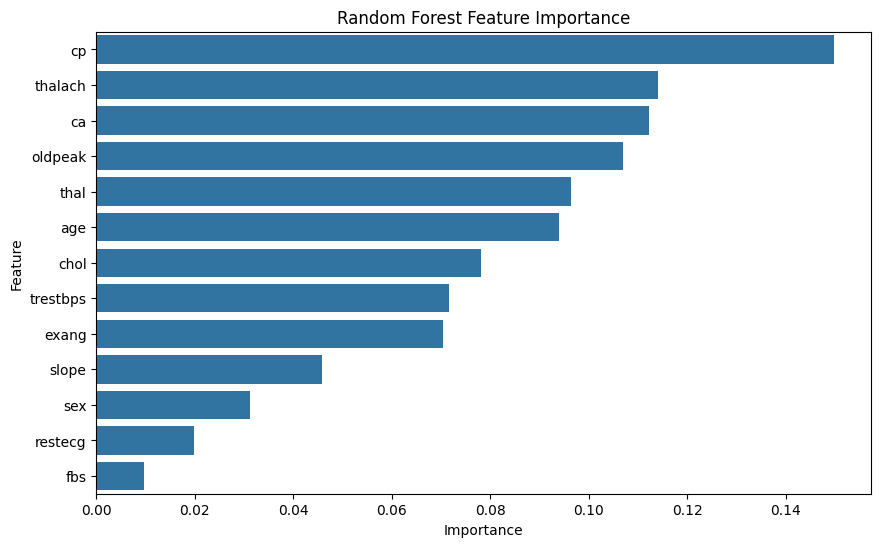

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setelah model.fit(X_train, y_train)
importances = model_RFC.feature_importances_
features = x.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [20]:
y_pred_RFC = model_RFC.predict(X_test)

In [34]:
test_accuracy_RFC = accuracy_score(Y_test, y_pred_RFC)
# test_accuracy_RFC
print(f"Random Forest - Test Accuracy: {test_accuracy_RFC:.4f}")

Random Forest - Test Accuracy: 1.0000
